# Trading Signal Features

---

### Import Libraries and Dependencies

In [144]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in CSV as Pandas DataFrame

In [145]:
# Set path to CSV and read in CSV
csv_path = Path('BTC_USD.csv')
btc_df=pd.read_csv(csv_path)
btc_df

,Date,Close,Open,High,Low,Volumen,Change %
0,15-Jan-21,38856.0,39145.0,39476.0,38856.0,12060,-0.80%
1,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%
2,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%
3,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%
4,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%
...,...,...,...,...,...,...,...
1089,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%
1090,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%
1091,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%
1092,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%


### Set Index, Infer DateTimeFormat, and Drop Extraneous Columns

In [146]:
# Set index as datetime object and drop extraneous columns
btc_df.set_index(pd.to_datetime(btc_df['Date'], infer_datetime_format=True), inplace=True)

btc_df

,Date,Close,Open,High,Low,Volumen,Change %
Date,,,,,,,
2021-01-15,15-Jan-21,38856.0,39145.0,39476.0,38856.0,12060,-0.80%
2021-01-14,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%
...,...,...,...,...,...,...,...
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%


### Drop NAs and Calculate Daily Returns 

In [147]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['Close'].dropna().pct_change()
btc_df

,Date,Close,Open,High,Low,Volumen,Change %,daily_return
Date,,,,,,,,
2021-01-15,15-Jan-21,38856.0,39145.0,39476.0,38856.0,12060,-0.80%,NaN
2021-01-14,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%,0.008081
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,-0.045826
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.087545
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,0.040260
...,...,...,...,...,...,...,...,...
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.004437
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,0.068982
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.105437


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [148]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_close'] = btc_df['Close'].ewm(halflife=short_window).mean()
btc_df['slow_close'] = btc_df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['crossover_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
btc_df['crossover_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
btc_df['crossover_signal'] = btc_df['crossover_long'] + btc_df['crossover_short']

btc_df.head()

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,,,,,,,
2021-01-15,15-Jan-21,38856.0,39145.0,39476.0,38856.0,12060,-0.80%,NaN,38856.000000,38856.000000,0.0,0.0,0.0
2021-01-14,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%,0.008081,39065.333333,39018.439028,1.0,0.0,1.0
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,-0.045826,38099.428571,38432.246751,0.0,-1.0,-1.0
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.087545,35968.000000,37234.944990,0.0,-1.0,-1.0
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,0.040260,35714.064516,36832.780391,0.0,-1.0,-1.0


### Plot Exponential Moving Average of Closing Prices

<AxesSubplot:xlabel='Date'>

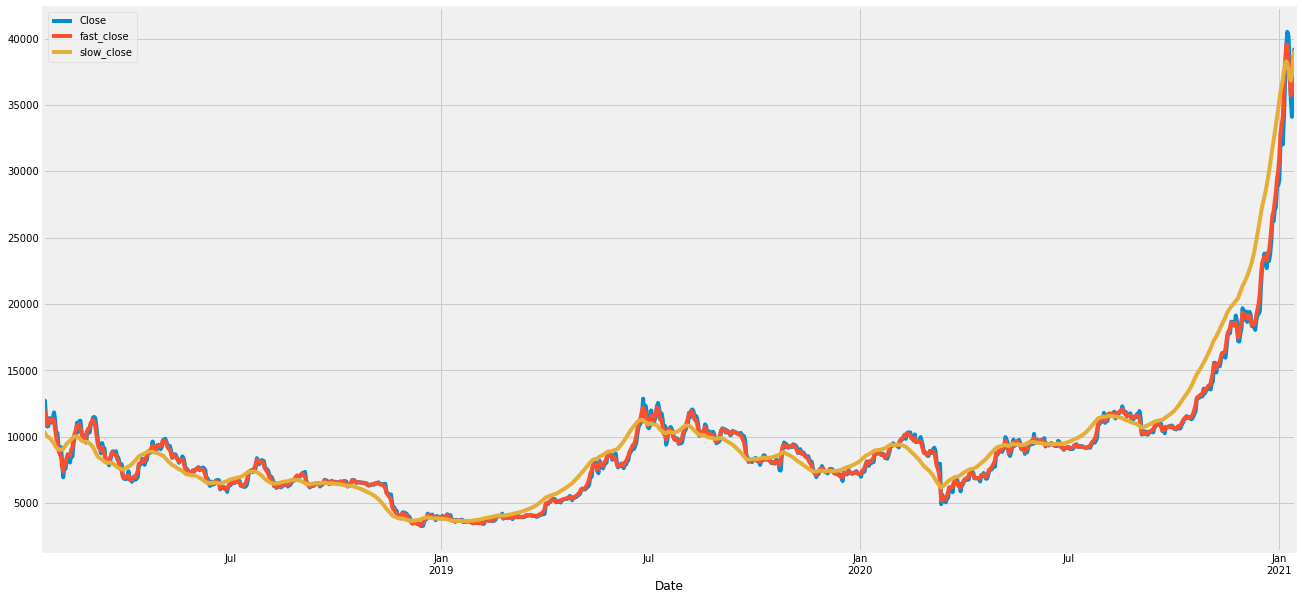

In [149]:
# Plot the EMA of BTC/USD closing prices
btc_df[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

### Construct Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

In [150]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_vol'] = btc_df['daily_return'].ewm(halflife=short_vol_window).std()
btc_df['slow_vol'] = btc_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
btc_df['vol_trend_long'] = np.where(btc_df['fast_vol'] < btc_df['slow_vol'], 1.0, 0.0)
btc_df['vol_trend_short'] = np.where(btc_df['fast_vol'] > btc_df['slow_vol'], -1.0, 0.0) 
btc_df['vol_trend_signal'] = btc_df['vol_trend_long'] + btc_df['vol_trend_short']

btc_df

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Date,,,,,,,,,,,,,,,,,,
2021-01-15,15-Jan-21,38856.0,39145.0,39476.0,38856.0,12060,-0.80%,NaN,38856.000000,38856.000000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2021-01-14,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%,0.008081,39065.333333,39018.439028,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,-0.045826,38099.428571,38432.246751,0.0,-1.0,-1.0,0.038118,0.038118,0.0,0.0,0.0
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.087545,35968.000000,37234.944990,0.0,-1.0,-1.0,0.044846,0.047783,1.0,0.0,1.0
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,0.040260,35714.064516,36832.780391,0.0,-1.0,-1.0,0.071006,0.058010,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.004437,10913.577765,10038.141230,1.0,0.0,1.0,0.033469,0.065245,1.0,0.0,1.0
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,0.068982,11213.788883,10136.975077,1.0,0.0,1.0,0.055181,0.064919,1.0,0.0,1.0
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.105437,11970.894441,10310.488265,1.0,0.0,1.0,0.061277,0.067075,1.0,0.0,1.0


### Plot Exponential Moving Average of Daily Return Volatility

<AxesSubplot:xlabel='Date'>

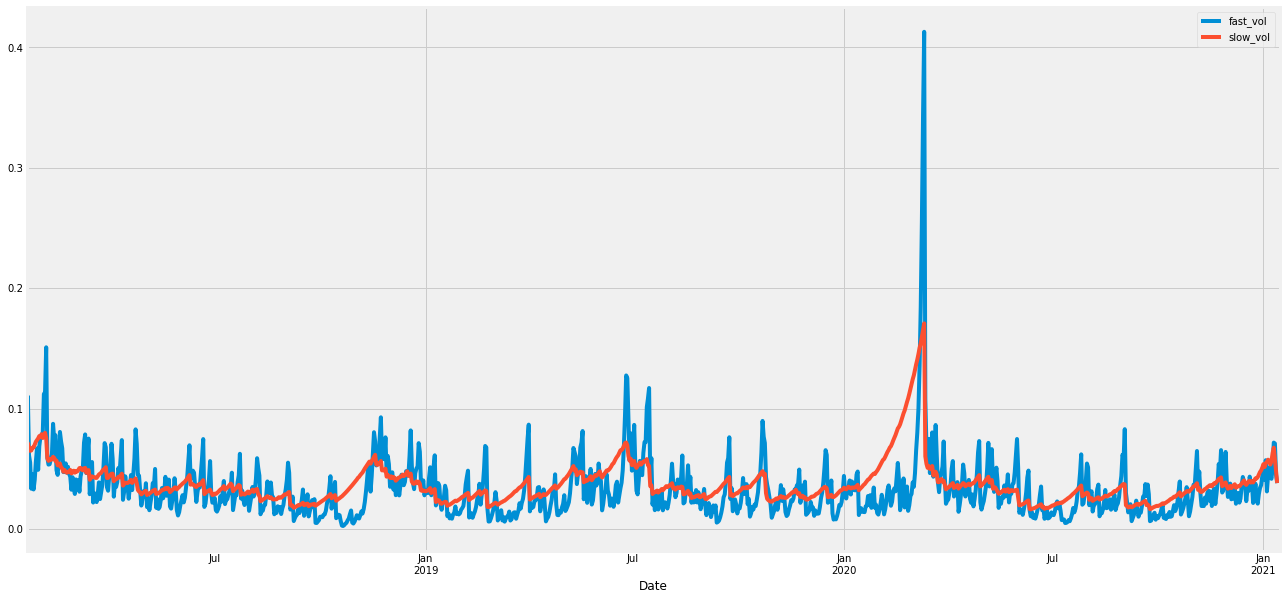

In [151]:
# Plot the EMA of BTC/USD daily return volatility
btc_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [152]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
btc_df['bollinger_mid_band'] = btc_df['Close'].rolling(window=bollinger_window).mean()
btc_df['bollinger_std'] = btc_df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
btc_df['bollinger_upper_band']  = btc_df['bollinger_mid_band'] + (btc_df['bollinger_std'] * 1)
btc_df['bollinger_lower_band']  = btc_df['bollinger_mid_band'] - (btc_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
btc_df['bollinger_long'] = np.where(btc_df['Close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
btc_df['bollinger_short'] = np.where(btc_df['Close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
btc_df['bollinger_signal'] = btc_df['bollinger_long'] + btc_df['bollinger_short']

btc_df

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-15,15-Jan-21,38856.0,39145.0,39476.0,38856.0,12060,-0.80%,NaN,38856.000000,38856.000000,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-01-14,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%,0.008081,39065.333333,39018.439028,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,-0.045826,38099.428571,38432.246751,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.087545,35968.000000,37234.944990,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,0.040260,35714.064516,36832.780391,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.004437,10913.577765,10038.141230,...,1.0,0.0,1.0,9668.970,1518.611837,11187.581837,8150.358163,0.0,0.0,0.0
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,0.068982,11213.788883,10136.975077,...,1.0,0.0,1.0,9816.515,1548.569000,11365.084000,8267.946000,0.0,-1.0,-1.0
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.105437,11970.894441,10310.488265,...,1.0,0.0,1.0,10018.755,1653.347078,11672.102078,8365.407922,0.0,-1.0,-1.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='Date'>

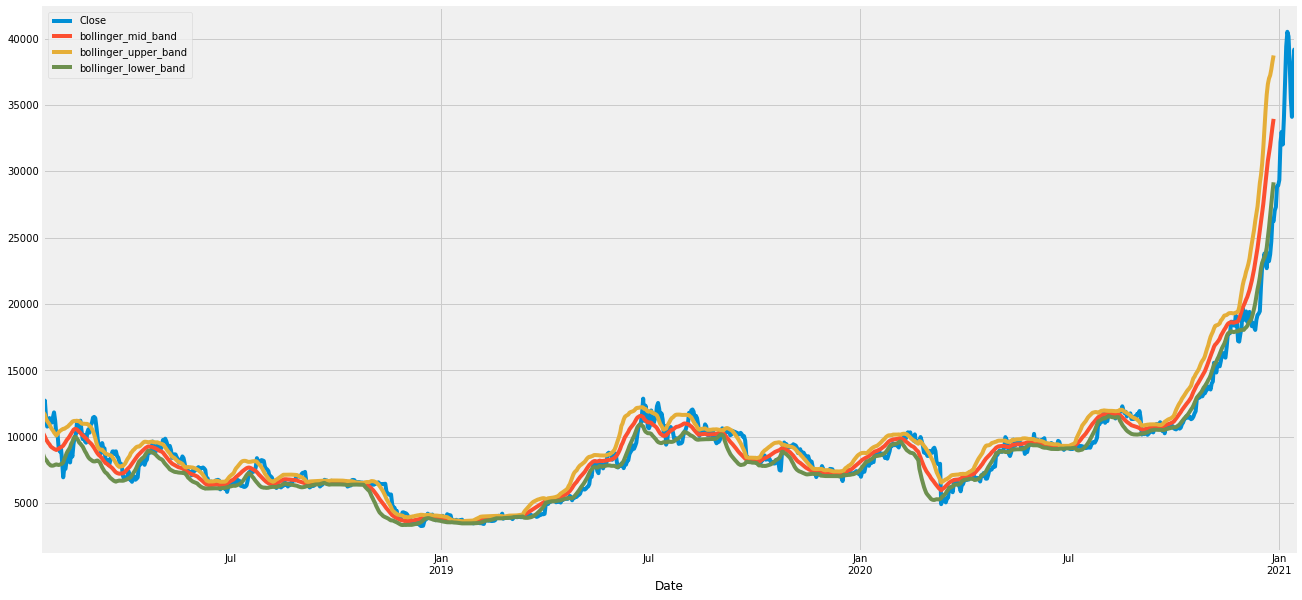

In [153]:
# Plot the Bollinger Bands for BTC/USD closing prices
btc_df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

Construct True Strength Index (Trading Signal, Feature Four)


In [154]:
#set window fast and slow 
#set close
#set fillna
#

Construct Moving Average Convergence Divergence (MACD) Signal Feature four 

In [155]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [156]:
#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = btc_df.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = btc_df.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()


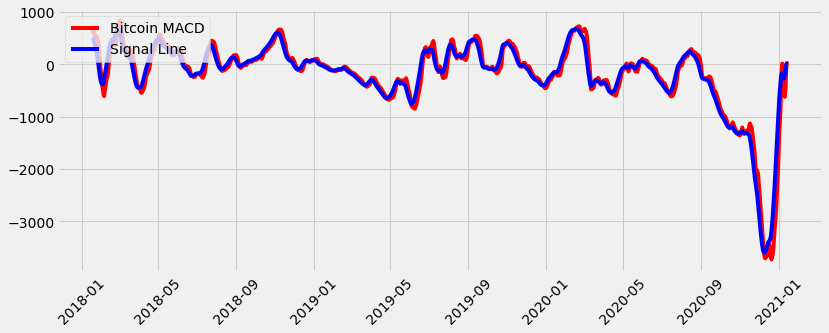

In [157]:
#Plot the chart
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(btc_df.index, MACD, label='Bitcoin MACD', color = 'red')
plt.plot(btc_df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [164]:
#Create new columns for the data frame 
btc_df['MACD'] = MACD
btc_df['macd_line'] = signal
#Show the new data frame
btc_df

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,fast_close,slow_close,...,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,MACD,Signal Line,MACD_Buy_Signal_Price,MACD_Sell_Signal_Price,macd_Signal,macd_line
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-15,15-Jan-21,38856.0,39145.0,39476.0,38856.0,12060,-0.80%,NaN,38856.000000,38856.000000,...,NaN,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000,0.000000
2021-01-14,14-Jan-21,39170.0,37374.0,39750.0,37193.0,12970,4.80%,0.008081,39065.333333,39018.439028,...,NaN,0.0,0.0,0.0,25.048433,5.009687,39170.0,NaN,5.009687,5.009687
2021-01-13,13-Jan-21,37375.0,34106.0,37418.0,33160.0,14890,9.59%,-0.045826,38099.428571,38432.246751,...,NaN,0.0,0.0,0.0,-98.803062,-15.752863,NaN,37375.0,-15.752863,-15.752863
2021-01-12,12-Jan-21,34103.0,35448.0,35838.6,33616.0,22180,-3.87%,-0.087545,35968.000000,37234.944990,...,NaN,0.0,0.0,0.0,-455.725993,-103.747489,NaN,NaN,-103.747489,-103.747489
2021-01-11,11-Jan-21,35476.0,38226.0,38226.0,31842.0,48040,-7.19%,0.040260,35714.064516,36832.780391,...,NaN,0.0,0.0,0.0,-620.645942,-207.127180,NaN,NaN,-207.127180,-207.127180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-22,22-Jan-18,10771.0,11519.0,11886.0,10009.0,66350,-6.45%,-0.004437,10913.577765,10038.141230,...,8150.358163,0.0,0.0,0.0,502.032309,340.702596,NaN,NaN,340.702596,340.702596
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,0.068982,11213.788883,10136.975077,...,8267.946000,0.0,-1.0,-1.0,537.862026,380.134482,NaN,NaN,380.134482,380.134482
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.105437,11970.894441,10310.488265,...,8365.407922,0.0,-1.0,-1.0,656.647565,435.437098,NaN,NaN,435.437098,435.437098


In [165]:
btc_df['macd_long'] = np.where(btc_df['MACD'] > btc_df['macd_line'], 1.0, 0.0)
btc_df['macd_short'] = np.where(btc_df['macd_line'] < btc_df['MACD'], -1.0, 0.0)
btc_df['macd_signal'] = btc_df['macd_long'] + btc_df['macd_short']

<AxesSubplot:xlabel='Date'>

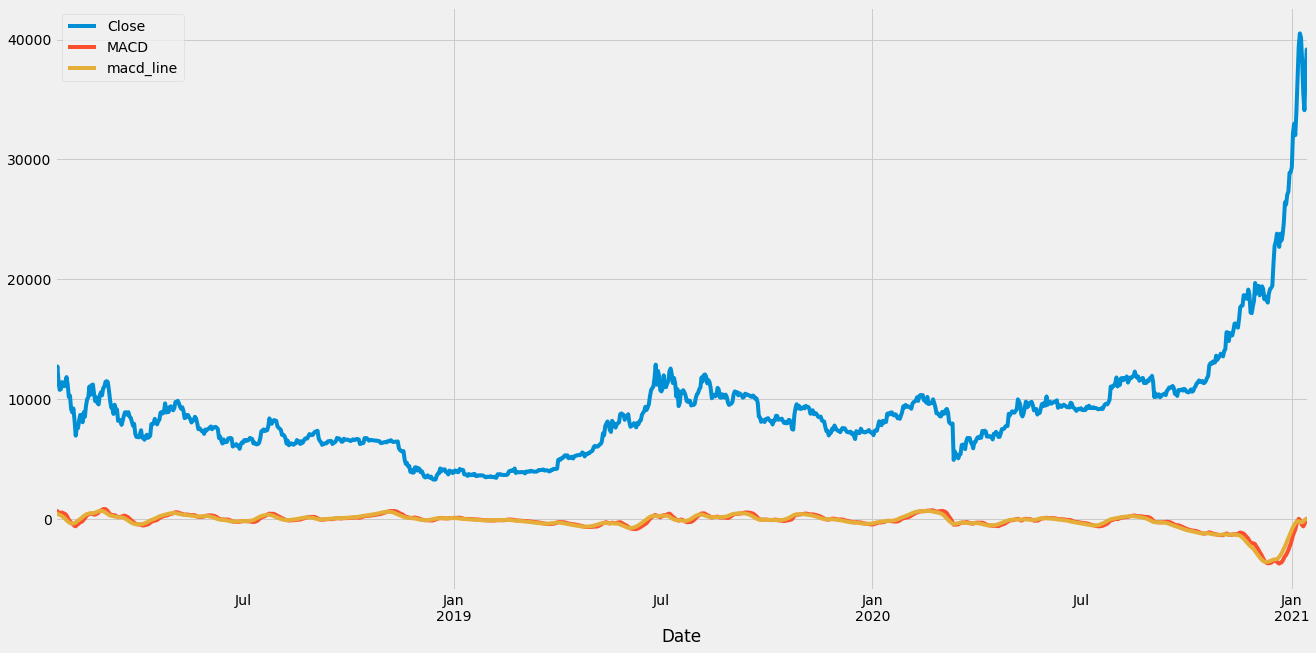

In [166]:
btc_df[['Close', 'MACD', 'macd_line']].plot(figsize=(20,10))

#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

#Create buy and sell columns
x = buy_sell(btc_df)
btc_df['MACD_Buy_Signal_Price'] = x[0]
btc_df['MACD_Sell_Signal_Price'] = x[1]
#Show the data frame
btc_df

# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_crypto = btc_df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_crypto.index, my_crypto['MACD_Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_crypto.index, my_crypto['MACD_Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_crypto['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [167]:
delta = btc_df['Close'].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
delta = delta.dropna() # or delta[1:]
up =  delta.copy() #Make a copy of this object's indices and data
down = delta.copy() #Make a copy of this object's indices and data
up[up < 0] = 0 
down[down > 0] = 0 
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))


Construct Relative Strength Index RSI(Trading Signal, Feature Five)

plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

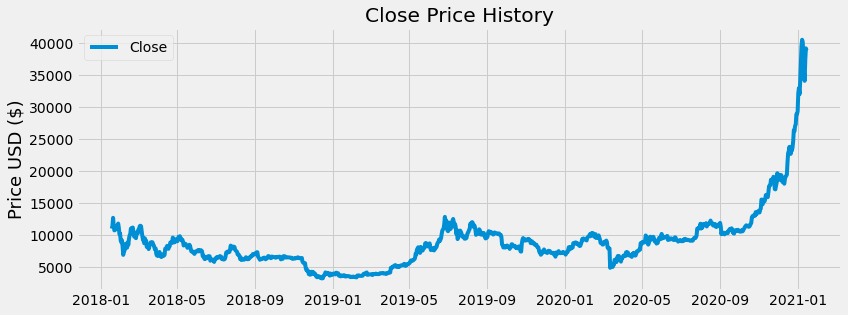

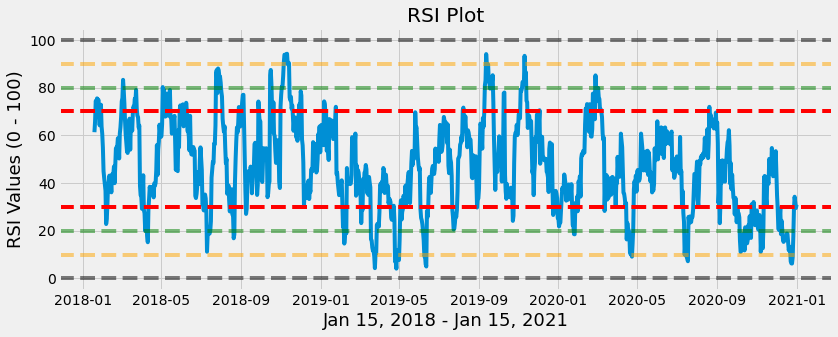

In [168]:
new_df = pd.DataFrame()
new_df['Close'] = btc_df['Close']
new_df['RSI'] = RSI
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Close'])
plt.title('Close Price History')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(new_df.columns.values, loc='upper left')
plt.show()
plt.figure(figsize=(12.33,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(10, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(30, linestyle='--',color = 'red')
plt.axhline(70, linestyle='--', color = 'red')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(90, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(100, linestyle='--', alpha=0.5, color = 'black')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('RSI Values (0 - 100)',fontsize=18)
plt.show()

In [ ]:
btc_df['RSI']= RSI
btc_df['rsi_long'=np.where

In [169]:
from ta.trend import (
    MACD,
    ADXIndicator,
    AroonIndicator,
    CCIIndicator,
    DPOIndicator,
    EMAIndicator,
    IchimokuIndicator,
    KSTIndicator,
    MassIndex,
    PSARIndicator,
    SMAIndicator,
    STCIndicator,
    TRIXIndicator,
    VortexIndicator,
)

In [170]:
from ta.volatility import (
    AverageTrueRange,
    BollingerBands,
    DonchianChannel,
    KeltnerChannel,
    UlcerIndex,
)

In [171]:
from ta.momentum import (
    AwesomeOscillatorIndicator,
    KAMAIndicator,
    PercentagePriceOscillator,
    PercentageVolumeOscillator,
    ROCIndicator,
    RSIIndicator,
    StochasticOscillator,
    StochRSIIndicator,
    TSIIndicator,
    UltimateOscillator,
    WilliamsRIndicator,
)

In [176]:
  # Vortex Indicator
indicator_vortex = VortexIndicator(
    high=btc_df['High'], low=btc_df['Low'], close=btc_df['Close'], window=14
    )
btc_df[f"{colprefix}trend_vortex_ind_pos"] = indicator_vortex.vortex_indicator_pos()
btc_df[f"{colprefix}trend_vortex_ind_neg"] = indicator_vortex.vortex_indicator_neg()
btc_df[f"{colprefix}trend_vortex_ind_diff"] = indicator_vortex.vortex_indicator_diff()

NameError: name 'colprefix' is not defined

In [ ]:
  # Ichimoku Indicator
    indicator_ichi = IchimokuIndicator(
        high=df[high],
        low=df[low],
        window1=9,
        window2=26,
        window3=52,
        visual=False,
        fillna=fillna,
    )
    df[f"{colprefix}trend_ichimoku_conv"] = indicator_ichi.ichimoku_conversion_line()
    df[f"{colprefix}trend_ichimoku_base"] = indicator_ichi.ichimoku_base_line()
    df[f"{colprefix}trend_ichimoku_a"] = indicator_ichi.ichimoku_a()
    df[f"{colprefix}trend_ichimoku_b"] = indicator_ichi.ichimoku_b()
    indicator_ichi_visual = IchimokuIndicator(
        high=df[high],
        low=df[low],
        window1=9,
        window2=26,
        window3=52,
        visual=True,
        fillna=fillna,
    )
    df[f"{colprefix}trend_visual_ichimoku_a"] = indicator_ichi_visual.ichimoku_a()
    df[f"{colprefix}trend_visual_ichimoku_b"] = indicator_ichi_visual.ichimoku_b()


In [ ]:
  # Percentage Price Oscillator
    indicator_ppo = PercentagePriceOscillator(
        close=df[close], window_slow=26, window_fast=12, window_sign=9, fillna=fillna
    )
    df[f"{colprefix}momentum_ppo"] = indicator_ppo.ppo()
    df[f"{colprefix}momentum_ppo_signal"] = indicator_ppo.ppo_signal()
    df[f"{colprefix}momentum_ppo_hist"] = indicator_ppo.ppo_hist()